# Giữa kỳ

## THÔNG TIN

- Họ tên: Trần Nguyên Vũ
- STT: 74
- MSV: 21088201

Bài thi GK

In [1]:
# import library...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## ĐỀ BÀI

Hai bộ dữ liệu `gmp-continents.csv` và `gmp-countries.csv` chứa thông tin về các dân số quốc gia và khu vực qua các năm khác nhau

### Câu 1: (1 điểm)

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [2]:
gmp_continents = pd.read_csv('./gmp-continents.csv')
gmp_countries = pd.read_csv('./gmp-countries.csv')

print("Kích thước dữ liệu gmp_continents: ", gmp_continents.shape)
print("Kích thước dữ liệu gmp_countries: ", gmp_countries.shape)

Kích thước dữ liệu gmp_continents:  (4, 223)
Kích thước dữ liệu gmp_countries:  (197, 223)


### Câu 2 (2 điểm)

a, (1 điểm) Liệt kê top 5 nước có dân số cao nhất năm 2020

b, (1 điểm) Vẽ đồ thị pie-chart để hiển thị tỷ lệ dân số giữa các châu lục

In [3]:
# a)
top_5_countries_2020 = gmp_countries.sort_values(by='2020', ascending=False).head(5)

top_5_countries_2020

,geo,name,1800,1801,1802,1803,1804,1805,1806,1807,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
35,chn,China,330000000,331538997,333085172,334638557,336199187,337767094,339342314,340924881,...,1376497633,1384206408,1391883335,1399453966,1406847868,1414049353,1421021794,1427647789,1433783692,1439323774
77,ind,India,200733034,201128850,201525446,201922822,202320984,202719931,203119662,203520184,...,1250287939,1265780243,1280842119,1295600768,1310152392,1324517250,1338676779,1352642283,1366417756,1380004385
187,usa,United States,6000000,6113782,6229723,6347862,6468241,6590903,6715891,6843249,...,311584051,314043885,316400539,318673422,320878312,323015992,325084758,327096263,329064917,331002647
78,idn,Indonesia,16108545,16150710,16192985,16235371,16277868,16320476,16363196,16406028,...,245115988,248451714,251805314,255128076,258383257,261556386,264650969,267670549,270625567,273523621
132,pak,Pakistan,13119841,13145712,13171633,13197606,13223629,13249704,13275830,13302008,...,183340168,187280125,191260799,195305012,199426953,203631356,207906210,212228288,216565317,220892331


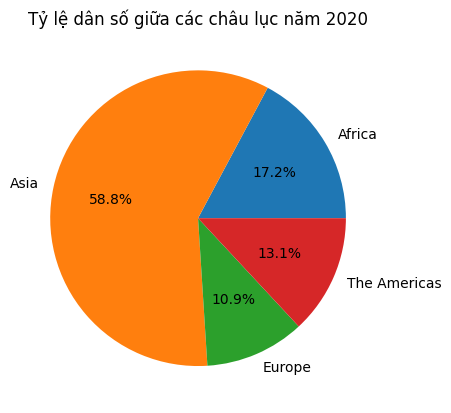

In [4]:
# b)
plt.pie(gmp_continents['2020'], labels=gmp_continents['name'], autopct='%1.1f%%')
plt.title('Tỷ lệ dân số giữa các châu lục năm 2020')

plt.show()

### Câu 3: (2 điểm)

a, (1 điểm) Vẽ đồ thị histogram dân số các nước năm 2000. (Gợi ý: sử dụng hàm `np.log` để vẽ histogram của thuộc tính population thay vì vẽ histogram trực tiệp

b, (1 điểm) Vẽ đồ thị boxplot dân số các nước từ năm 2010 - 2020 (gợi ý: sử dụng hàm `melt()`)

Text(0.5, 1.0, 'Dân số các nước năm 2000')

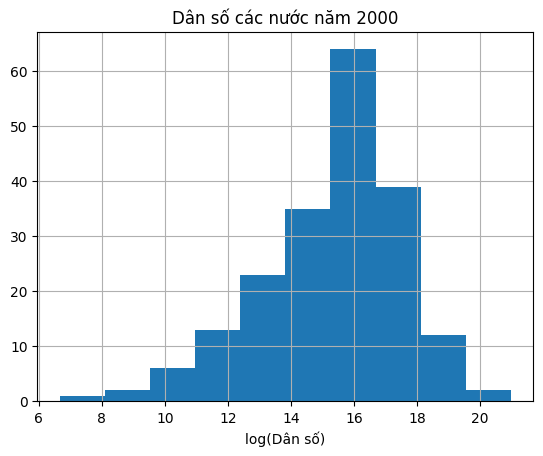

In [5]:
# a)
np.log(gmp_countries['2000']).hist().set_xlabel('log(Dân số)')
plt.title('Dân số các nước năm 2000')

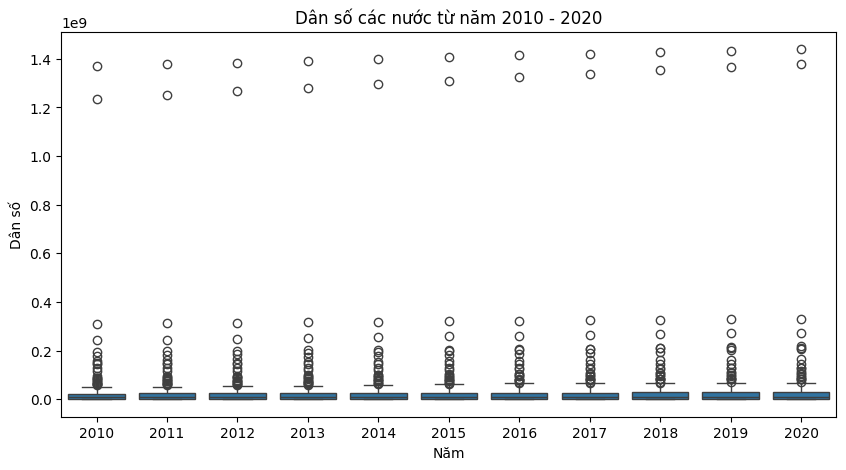

In [6]:
# b)
gmp_countries_melt = pd.melt(gmp_countries, id_vars=['name'], value_vars=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
plt.figure(figsize=(10, 5))
sns.boxplot(x='variable', y='value', data=gmp_countries_melt)
plt.title('Dân số các nước từ năm 2010 - 2020')
plt.xlabel('Năm')
plt.ylabel('Dân số')
plt.show()

### Câu 4: (2 điểm)

a, (1.5 điểm) Vẽ biểu đồ tăng trưởng về dân số của 10 quốc gia Đông Nam Á từ năm 2000-2020

b, (0.5 điểm) Dựa vào hình vẽ bạn hãy cho biết quốc gia nào có tốc độ tăng trưởng nhanh nhất?

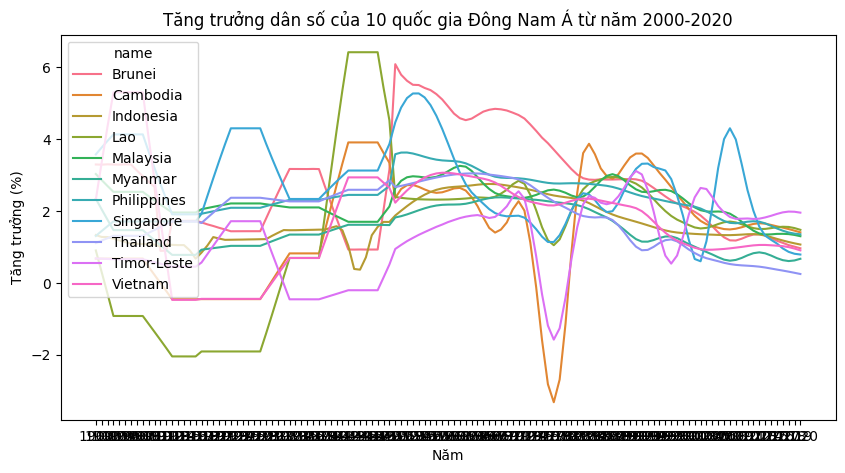

In [9]:
# a)
gmp_countries_sea = gmp_countries[gmp_countries['name'].isin(['Vietnam', 'Thailand', 'Singapore', 'Philippines', 'Myanmar', 'Malaysia', 'Lao', 'Indonesia', 'Cambodia', 'Brunei', 'Timor-Leste'])]

# Chuyển dữ liệu sang phần trăm tăng trưởng
gmp_countries_sea_growth_percent = gmp_countries_sea.copy()
for i in range(2001, 2021):
    gmp_countries_sea_growth_percent[str(i)] = (gmp_countries_sea[str(i)] - gmp_countries_sea[str(i - 1)]) / gmp_countries_sea[str(i - 1)] * 100

gmp_countries_sea_growth_percent = gmp_countries_sea_growth_percent.melt(id_vars=['name'], value_vars=[str(i) for i in range(2001, 2021)])

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
sns.lineplot(data=gmp_countries_sea_growth_percent, x='variable', y='value', hue='name')
plt.title('Tăng trưởng dân số của 10 quốc gia Đông Nam Á từ năm 2000-2020')
plt.xlabel('Năm')
plt.ylabel('Tăng trưởng (%)')

plt.show()

## b) Dựa vào hình vẽ, ta thấy rằng quốc gia có tốc độ tăng trưởng nhanh nhất là Timor-Leste

---